## Понижение размерности, посик аномалий

# Обучение без учителя


## Подготовка датасета

In [15]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [16]:
dataset = pd.read_csv('D:/Git/ml_data.mining/data/indian_liver_patient.csv')
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
vals = dataset["Dataset"].unique()
vals

array([1, 2])

In [18]:
dataset['Dataset'] = dataset['Dataset'].replace({1: 0, 2: 1})

In [19]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['nnAge', 'nnAlkaline_Phosphotase', 'nnAlamine_Aminotransferase', 'nnAspartate_Aminotransferase']] = scaler_mm.fit_transform(dataset[['Age', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase']])
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,nnAge,nnAlkaline_Phosphotase,nnAlamine_Aminotransferase,nnAspartate_Aminotransferase
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0.709302,0.060576,0.003015,0.001626
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0,0.674419,0.310699,0.027136,0.018296
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0,0.674419,0.208598,0.025126,0.011791
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0,0.627907,0.058134,0.002010,0.002033
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0,0.790698,0.064485,0.008543,0.009961


In [20]:
dataset = dataset.drop(['Gender', 'Age','Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], axis=1)

In [21]:
dataset = dataset.dropna()

In [22]:
cols = dataset.columns

In [23]:
cols

Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset', 'nnAge',
       'nnAlkaline_Phosphotase', 'nnAlamine_Aminotransferase',
       'nnAspartate_Aminotransferase'],
      dtype='object')

In [24]:
cols_for_clusters = ['Total_Bilirubin', 'Direct_Bilirubin', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'nnAge', 'nnAlkaline_Phosphotase', 'nnAlamine_Aminotransferase', 'nnAspartate_Aminotransferase']

df= dataset[cols_for_clusters].copy()

In [25]:
cols_for_clusters = df.columns

In [26]:
X = df
y = dataset["Dataset"]
yvals = dataset["Dataset"]

In [27]:
df.shape

(579, 9)

# Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)

* Principal Component Analysis (PCA)
* Independent Component Analysis (ICA)





### Метод главных компонентов (Principal Component Analysis, PCA)

PCA — это метод на основе проекций, который часто используется для уменьшения размерности больших наборов данных путем преобразования большого набора переменных в меньший, который по-прежнему содержит большую часть информации о большом наборе.



In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

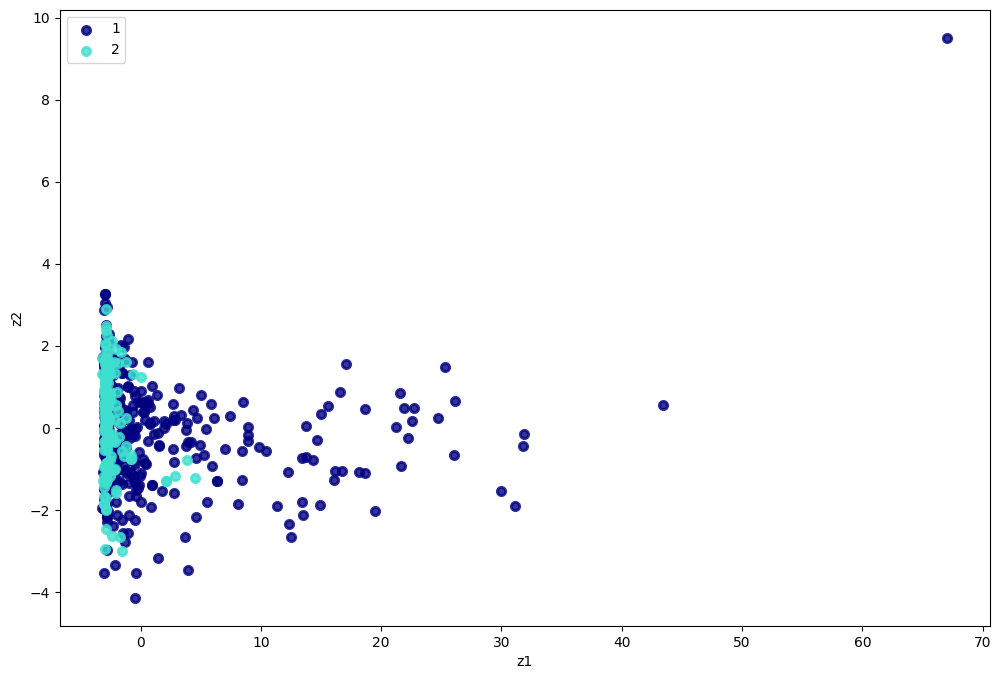

In [29]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Функция для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio.



In [30]:
pca.explained_variance_ratio_

array([0.92735142, 0.03374643])

Как вы можете видеть выше, первые главные компоненты сохраняют 92% дисперсии набора данных indian_liver_patient, тогда как вторые главные компоненты сохраняют только 0.3% дисперсии. Это указывает на то, что мы, получили хороший результат.

### Независимый анализ компонентов (Independent Component Analysis, ICA)


In [31]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

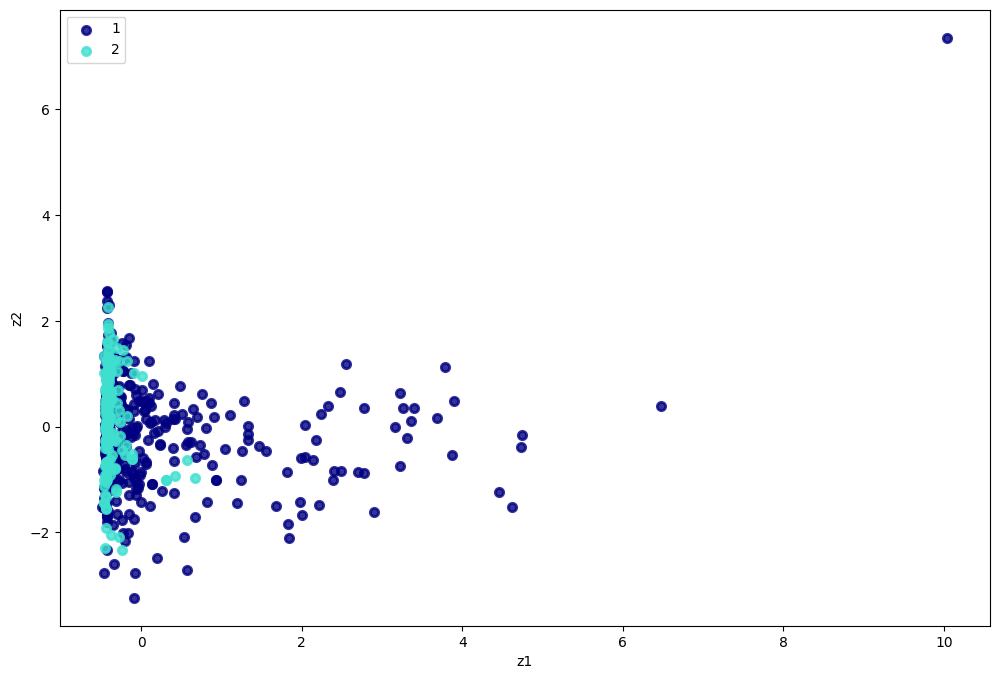

In [32]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Вывод по линейным методам: Признаки 3(зеленый) и 4(голубой) зависят друг от друга

#Нелинейные методы уменьшения размерности

Методы нелинейного преобразования, также известные как методы многообразного обучения, используются, когда данные не лежат в линейном подпространстве. Она основана на гипотезе многообразия, которая гласит, что в многомерной структуре большая часть релевантной информации концентрируется в небольшом числе многообразий низкой размерности.



### Kernel PCA


In [33]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

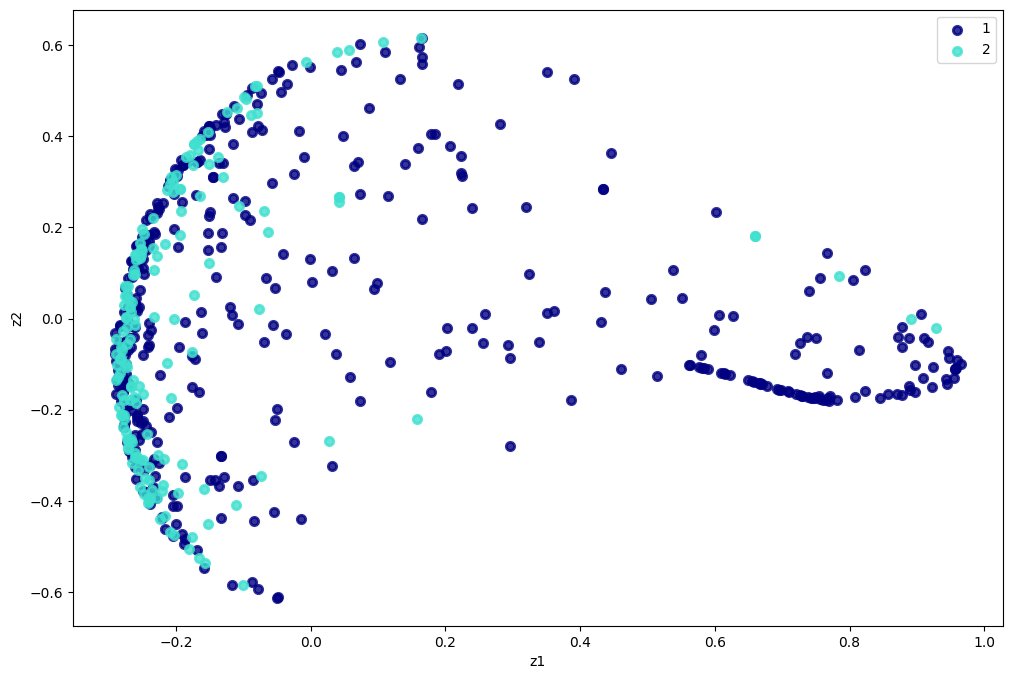

In [34]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### tSNE

t-SNE - метод, который использует поэтапный итерационный подход для низкоразмерного представления исходных данных с сохранением информации об их локальном соседстве.


In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [36]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (579, 9)
New Shape of X:  (579, 2)
Kullback-Leibler divergence after optimization:  0.4482065439224243
No. of iterations:  999


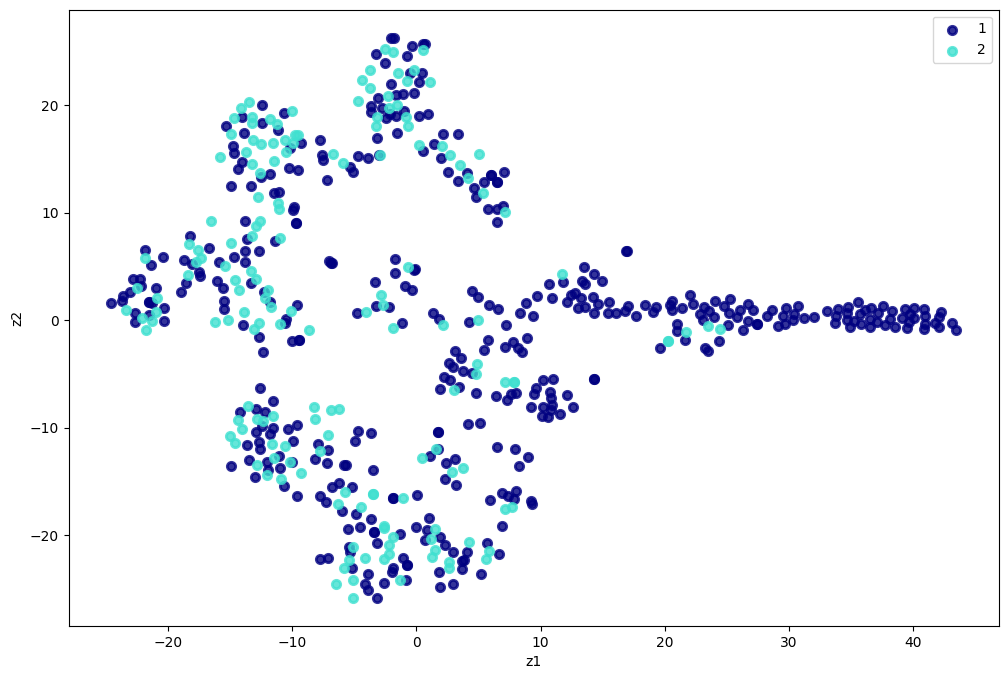

In [37]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Поиск выбросов. DBSCAN

DBSCAN расшифровывается как Density-Based Spatial Clustering of Applications with Noise. Он принадлежит к семейству алгоритмов кластеризации с неконтролируемым обучением.



## DBSCAN для кластеризации

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [ ]:
dbscan_cluster1 = DBSCAN(eps = 1.0, min_samples = 4)
dbscan_cluster1.fit(X)

DBSCAN(eps=1.0, min_samples=4)

In [40]:
# Number of Clusters
labels=dbscan_cluster1.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print(f'Estimated no. of clusters: {N_clus}')

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print(f'Estimated no. of noise points: {n_noise}')

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 76
v_measure = 0.09310409091824573


C:\Users\kanze\AppData\Local\Temp\ipykernel_13124\1956467606.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", shadow=False, scatterpoints=2)


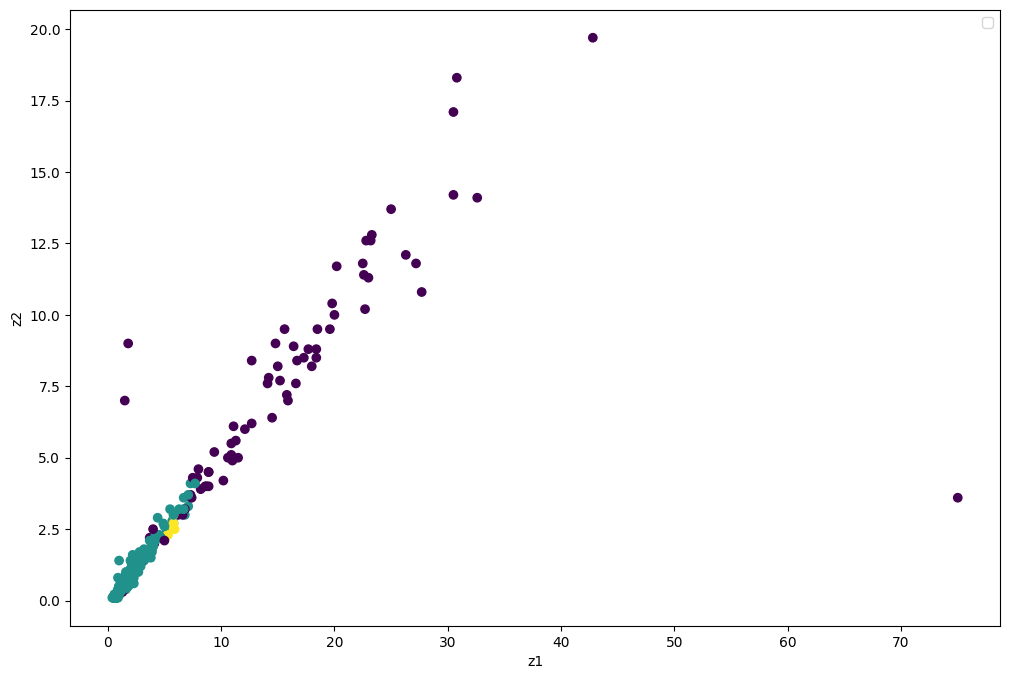

In [41]:
plt.figure(figsize=(12,8))
lw = 2

plt.scatter(
        X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

Подробнее о NearestNeighbors можно почитать тут:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

In [42]:
from sklearn.neighbors import NearestNeighbors

min_samples = 4

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [43]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

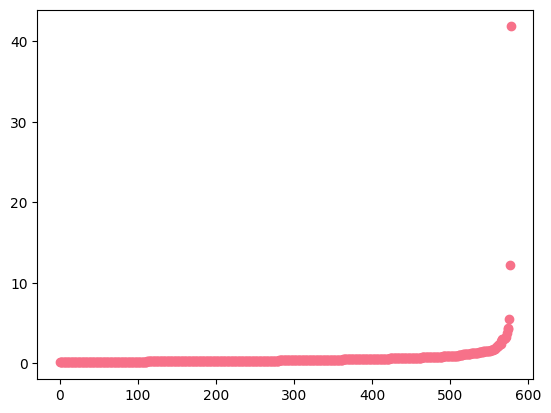

In [44]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps  выбирают в точке изгиба графика

## DBSCAN для определения выбросов

In [45]:
dbscan = DBSCAN(eps = 1.0, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=1.0, min_samples=4)


In [46]:
pred = dbscan.fit_predict(X)

In [47]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 76
v_measure = 0.09310409091824573


In [48]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

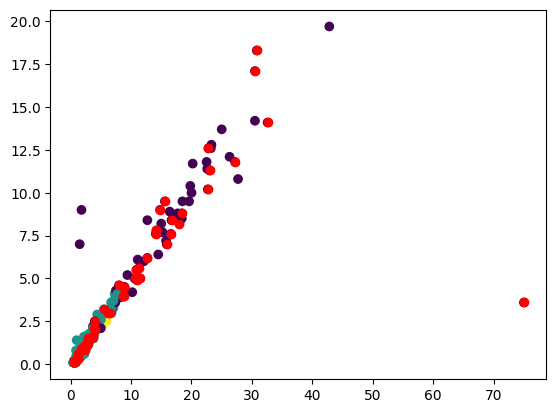

In [49]:
plt.scatter( X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r')
plt.show()

# Задание

1. Изучить теорию
1. Реализовать рассмотренные методы на своем датасете (признаков должно быть более 5)
1. Визуализировать результаты